In [71]:
import pandas as pd
pd.options.mode.chained_assignment = None 

df1 = pd.read_csv('labels0.csv',index_col=0)
df2 = pd.read_csv('and_or_labels0_annotated.csv',encoding='cp1252',index_col=0)
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

df_all = pd.concat([df1,df2])
rel_class = [1,2,3,4]
df = df_all.loc[df_all['classification'].isin(rel_class)]
#df = df_all.copy()
df.head()

,id,thread_title,reply_split,classification,Entity 1,Entity 2,Attribute,Direction
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1,NaN,NaN,NaN,NaN
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2,NaN,NaN,NaN,NaN
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,4,NaN,NaN,NaN,NaN
5,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1,NaN,NaN,NaN,NaN
42,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2,NaN,NaN,NaN,NaN


In [17]:
# substitute the rubber names using dictionary
import re
import csv

# load the dictionary
def csv2dict(fn):
    with open(fn) as f:
        reader = csv.reader(f)
        d = list(reader)
    return {k:v for (k,v) in d}
rub_dict = csv2dict('rub_dict.csv')

regex = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in rub_dict.keys()) + r')(?!\w)',re.IGNORECASE)

def sub_rubber_names(s):
    if isinstance(s, str):
        return regex.sub(lambda m: rub_dict[m.group(0).lower()],s)
    else:
        return ''

df.loc[:,'reply_sub'] = df['reply_split'].apply(sub_rubber_names)
df.head()

,id,thread_title,reply_split,classification,Entity 1,Entity 2,Attribute,Direction,reply_sub
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1,NaN,NaN,NaN,NaN,I used Butterfly-Tenergy-05-FX before and I re...
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2,NaN,NaN,NaN,NaN,On the other hand less spin too.
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,4,NaN,NaN,NaN,NaN,Very good for block.
5,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1,NaN,NaN,NaN,NaN,For my style I really prefer Butterfly-Tenergy...
42,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2,NaN,NaN,NaN,NaN,If you loop everything and are active in the s...


In [18]:
import nltk

# tokenize words, and remove stop words (if b_rm)
# then do pos tagging
def word_process(s, b_rm=0):
    wo = nltk.word_tokenize(s)
#    sw_include_list = 'than, as'    
#    if b_rm:
#        wo = [w for w in wo if w not in nltk.corpus.stopwords.words('english') or w in sw_include_list]
    wo_pt = nltk.pos_tag(wo)
    return wo_pt


In [19]:
df['reply_words'] = ''
df.loc[:,'reply_words'] = df['reply_sub'].apply(word_process)

In [20]:
# pick out the rubber names

# load the rubber list names
def csv2list(fn):
    with open(fn) as f:
        reader = csv.reader(f)
        d = list(reader)
    return [r[0] for r in d]
rub_list = csv2list('rub_name_list.csv')

def find_rubbers(s_words):
    l = []
    for (w, t) in s_words:
        if t == 'NNP' and w not in l:
            l.append(w)
        elif w in rub_list and w not in l:
            l.append(w)
    return l

df.loc[:,'entity'] = df['reply_words'].apply(find_rubbers)

In [21]:
# want to see of the ones that are labelled as 1, how many actually identify two rubbers

df.loc[:,'num_entity'] = df['entity'].apply(lambda l: len(l))

sum(df.loc[:].classification == 1)
b1 = df['classification'] == 1
b2 = df['num_entity'] >= 2
df_good = df[df['classification'] == 1 & (df['num_entity'] >= 2)]
df_bad = df[df['classification'] == 1 & (df['num_entity'] < 2)]
print(sum(b1))
print(sum(b2 & b1))

99
87


In [22]:
def print_all(p):
    print(p.reply_split)
    print(p.reply_sub)   
    print(p.reply_words)   
    print(p.entity)
print_all(df_bad.iloc[6])

But rakza 7is equally opp to rakza x in terms of feel and durability.
But rakza 7is equally opp to rakza x in terms of feel and durability.
[('But', 'CC'), ('rakza', 'VBZ'), ('7is', 'CD'), ('equally', 'RB'), ('opp', 'JJ'), ('to', 'TO'), ('rakza', 'VB'), ('x', 'NNP'), ('in', 'IN'), ('terms', 'NNS'), ('of', 'IN'), ('feel', 'NN'), ('and', 'CC'), ('durability', 'NN'), ('.', '.')]
['x']


In [23]:
i = 200
print(df.iloc[i].reply_split)
print(df.iloc[i].entity)

H3 has much better spin (like 2x of b2) and control.
['DHS-Hurricane-3']


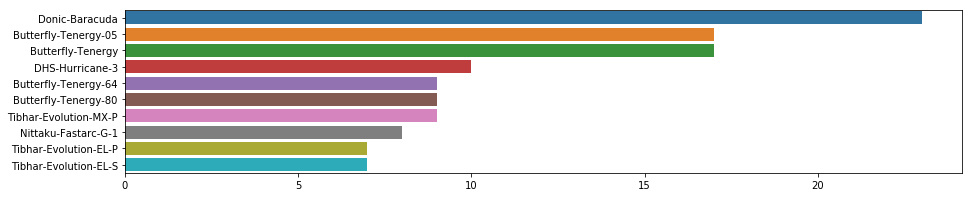

In [25]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

p = []
df[df['classification']==1].entity.apply(lambda l: p.extend(l))
most = Counter(p).most_common()

x, y= [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(15,3))
ax = sns.barplot(x=y,y=x)

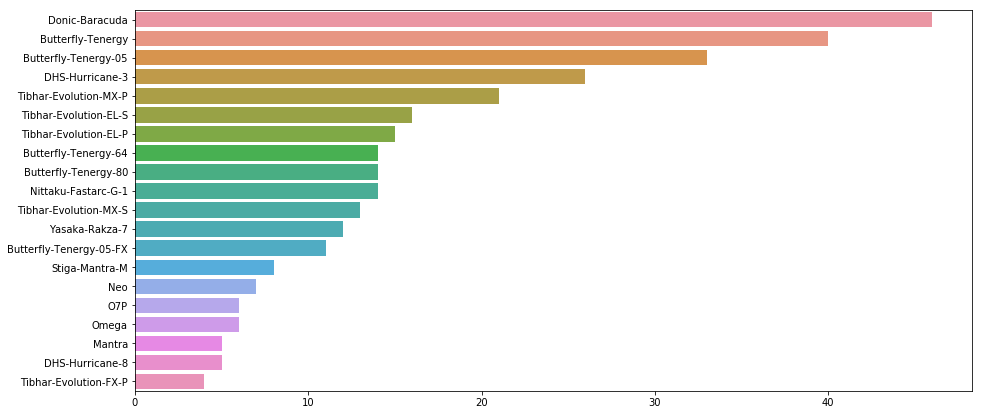

In [26]:
p = []
df.entity.apply(lambda l: p.extend(l))
most = Counter(p).most_common()

x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(15,7))
ax = sns.barplot(x=y,y=x)

In [33]:
comps = []
for ind, row in df[df['classification']==1].iterrows():
    entities = row.entity
    temp = []
    b = False
    for e in entities:
        if e == 'Donic-Baracuda':
            b = True
        else:
            temp.append(e)
    if b:
        comps.append(temp)
comps = [s for l in comps for s in l]


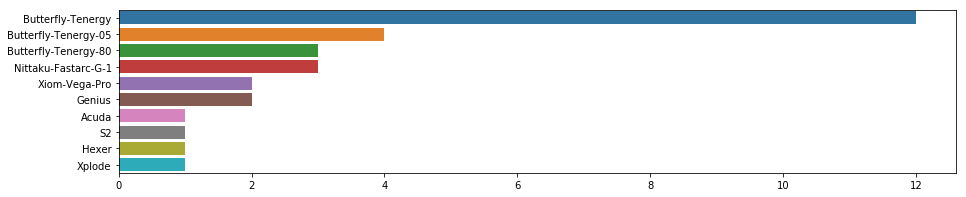

In [34]:
most = Counter(comps).most_common()

x, y= [], []
for word,count in most[:10]:
    x.append(word)
    y.append(count)

plt.figure(figsize=(15,3))
ax = sns.barplot(x=y,y=x)

In [122]:
comps

[['Butterfly-Tenergy'],
 ['Butterfly-Tenergy', 'Ten'],
 ['Butterfly-Tenergy'],
 ['Ten05'],
 ['Butterfly-Tenergy-80', 'Butterfly-Tenergy'],
 ['Butterfly-Tenergy'],
 ['Butterfly-Tenergy', 'Ten'],
 ['Butterfly-Tenergy'],
 ['Ten05'],
 ['Butterfly-Tenergy-80', 'Butterfly-Tenergy'],
 ['Butterfly-Tenergy'],
 ['Butterfly-Tenergy', 'Ten'],
 ['Butterfly-Tenergy'],
 ['Ten05'],
 ['Butterfly-Tenergy-80', 'Butterfly-Tenergy'],
 ['Nittaku-Fastarc-G-1'],
 [],
 ['Xiom-Vega-Pro', 'Acuda', 'S2'],
 [],
 ['Nittaku-Fastarc-G-1', 'Hexer', 'Genius', 'Xplode', 'Xiom-Vega-Pro'],
 ['Genius'],
 [],
 ['Butterfly-Tenergy-05']]

In [39]:
# wanna figure out what butterfly-tenergy refers to
ten_ind = []
ten_tit = []
for ind, row in df[df['classification']==1].iterrows():
    entities = row.entity
    for e in entities:
        if e == 'Butterfly-Tenergy':
            ten_ind.append(ind)
            ten_tit.append(row.thread_title)
            
print(ten_ind)
print(ten_tit)

[224, 226, 240, 255, 258, 260, 274, 289, 292, 294, 308, 323, 350, 425, 428, 1168, 2215]
['Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tenenergy 05 vs Donic Baracuda', 'Tibhar Evo EL-P vs FX-P for flicks and brushing loops', 'Need a new BH rubber: O7P vs DNA Pro M?', 'Need a new BH rubber: O7P vs DNA Pro M?', 'Tibhar Genius (vs Donic Baracuda)', 'backhand advice T05fx vs. T64']


In [57]:
df_c2 = df[df['classification']==2]
df_c2.iloc[130].reply_sub
df_c2.iloc[130].thread_title

'Mx-p VS Xiom Sigma 2 Europe Europe'

In [55]:
df_c2.shape

(148, 12)

SyntaxError: invalid syntax (<ipython-input-54-256ca61d3d9f>, line 3)

In [ ]:
w_tagged = df.iloc[0].reply_words
ent = nltk.ne_chunk(w_tagged, binary=True)
print(ent)

In [ ]:
import svgling
svgling.draw_tree(ent)


In [ ]:
from IPython.display import display


ent = nltk.ne_chunk(w_tagged, binary=True)
from IPython.display import Image

IPython.core.display.display(ent)


In [ ]:
# find the pronouns and comparative words
def isolate_words(s):
    l = []
    abb_list = ['CD','NNP','JJR','JJS','RBR','RBS']
    feat_list = ['spin','durable','heavy','weight','weigh','block']
    
    for w in s:
        if w[1] in abb_list:
            l.append(w)
            
    return l

In [ ]:
i = 5
print(df_test.iloc[i].reply_split)
print(df_test.iloc[i].reply_words)
print(isolate_words(df_test.iloc[i].reply_words))

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
nltk.stem.WordNetLemmatizer().lemmatize("weight",'n')

In [ ]:
import re

rub_dict = {'t05':'tenergy','t-05':'tenergy','h3':'hurricane'}
rub_dict = {k.lower(): v for k, v in rub_dict.items()}

regex = re.compile('|'.join(map(re.escape,rub_dict.keys())),re.IGNORECASE)

s = 'i love t05 and t-05, H3'
# m = regex.findall(s)
# print(m)
regex.sub(lambda m: rub_dict[m.group(0).lower()],s)

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [ ]:
# check if contains:
# 1. comparative adjective
# 2. word from comparative lexicon
comp_abb_list = ['JJR','JJS','RBR','RBS']
def b_comp_adj(w_pt):
    # input pos tag    
    b = 0
    if type(w_pt) is list:
        for w_tag in w_pt:
            if w_tag[1] in comp_abb_list:
                b = 1
    return b

# more, most, less, least, better, best, worse, worst, further/farther and furthest/farthest.
# beat, defeat, destroy, decimate, equal, equally, kill, lead, obliterate, outclass (out class and out-class),
# outdo, outperform, outplay, overtake (over take and over-take), smack, subdue, subpar, surpass, top,
# trump, unmated, win.

In [ ]:
rub_dict

In [70]:
# substitute the rubber names using dictionary
import re
import csv

# load the dictionary
def csv2dict(fn):
    with open(fn) as f:
        reader = csv.reader(f)
        d = list(reader)
    return {k:v for (k,v) in d}
rub_dict = csv2dict('rub_dict.csv')

regex = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in rub_dict.keys()) + r')(?!\w)',re.IGNORECASE)

def sub_rubber_names(s):
    if isinstance(s, str):
        return regex.sub(lambda m: rub_dict[m.group(0).lower()],s)
    else:
        return ''
    
def sub_rubber_names_2(s):
    if isinstance(s, str):
        for v in rub_dict:
            if v in s:
                s = s.replace(v, rub_dict[v]) 
    return s

df.loc[:,'reply_sub'] = df['reply_split'].apply(sub_rubber_names)
df.head()

,id,thread_title,reply_split,classification,Entity 1,Entity 2,Attribute,Direction,reply_sub
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1,NaN,NaN,NaN,NaN,I used Butterfly-Tenergy-05-FX before and I re...
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2,NaN,NaN,NaN,NaN,On the other hand less spin too.
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,4,NaN,NaN,NaN,NaN,Very good for block.
5,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1,NaN,NaN,NaN,NaN,For my style I really prefer Butterfly-Tenergy...
42,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2,NaN,NaN,NaN,NaN,If you loop everything and are active in the s...


In [58]:
df.shape


(407, 12)

In [79]:
nltk.pos_tag(str.split('it is not as good as rakza'))

[('it', 'PRP'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('as', 'RB'),
 ('good', 'JJ'),
 ('as', 'IN'),
 ('rakza', 'NN')]

In [81]:
len(rub_dict)

231